## Library of Congress & Chronicling America

This notebook uses historic newspapers and select digitized newspaper pages provided by [Chronicling America](https://chroniclingamerica.loc.gov/about/) (ISSN 2475-2703).

This example is based on the [*Bourbon News*](https://chroniclingamerica.loc.gov/lccn/sn86069873/) began publication in 1881 in Millersburg, Kentucky under the ownership of Confederate veteran and former farmer Bruce Champ. By 1910, the paper had 3,000 subscribers, ranking it among the largest circulations in the Bluegrass region. The paper continued publishing until 1941.

[Chronicling America](https://chroniclingamerica.loc.gov/about/api/) provides an extensive application programming interface (API) which you can use to explore all of the data. The information is also [published as JSON](https://chroniclingamerica.loc.gov/lccn/sn86069873.json), including the OCR text files.

### Setting things up

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import pickle
import re
import os
from pathlib import Path
import requests
from collections import Counter
import matplotlib.pyplot as plt
from numpy import mean, ones
from scipy.sparse import csr_matrix
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
import json

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/gustavo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Relationships between the volumes, issues and pages are describe in JSON. Each volume has several issues which contain several pages.

<img src="images/graph-loc.png">

### Let's retrieve the results!

The *Bourbon News* is accessible via a JSON file including all metadata. The attribute *issues* contains the URLs of all issues that, in turn, contain all *pages*.

In [2]:
url = 'https://chroniclingamerica.loc.gov/lccn/sn86069873.json'

r = requests.get(url)

ca_dict = json.loads(r.text)

df = pd.DataFrame(ca_dict['issues'])
df.head()

,url,date_issued
0,https://chroniclingamerica.loc.gov/lccn/sn8606...,1897-01-01
1,https://chroniclingamerica.loc.gov/lccn/sn8606...,1897-01-05
2,https://chroniclingamerica.loc.gov/lccn/sn8606...,1897-01-08
3,https://chroniclingamerica.loc.gov/lccn/sn8606...,1897-01-12
4,https://chroniclingamerica.loc.gov/lccn/sn8606...,1897-01-15


### How many issues?

In [3]:
df.count()

url            2432
date_issued    2432
dtype: int64

## Retrieving the OCR texts from Chronicling America

**Note:**  This step may take a while to process due to the number of issues. Uncomment the code in order to execute this step.

In [4]:
#for index, row in df.iterrows():
#    print(index, row['url'])
#    response = requests.get(row['url'])
#    text = ''
#    if response:
#        item = json.loads(response.text)
#        text = ''
#        for p in item['pages']:
#            print(p)
#            res_page = requests.get(p['url']) 
#            json_page = json.loads(res_page.text)
#            print(json_page['text'])
#            text = text + requests.get(json_page['text']).text.replace('\n','')
            
#        response = requests.get(json_page['text'])
#        filename = Path('editions-ca/{}'.format(row['url'].replace('https://chroniclingamerica.loc.gov/lccn/sn86069873/','').replace('/', '_')))
#        filename.write_bytes(response.content) 
#df.head(10)   

## Now we load the text into pandas dataframe

In [5]:
for index, row in df.iterrows():
    print(index, row['url'])
    #response = requests.get(row['url'])
    #print(response.status_code)
    
    filename = Path('editions-ca/{}'.format(row['url'].replace('https://chroniclingamerica.loc.gov/lccn/sn86069873/','').replace('/', '_')))
    
    text = ''
    
    if os.path.exists(filename):
        with open(filename, 'r') as myfile:
            text = myfile.read()
  
    df.loc[index, 'ocr_text'] = text
    #if index == 20:
    #    break
df.head()  

0 https://chroniclingamerica.loc.gov/lccn/sn86069873/1897-01-01/ed-1.json
1 https://chroniclingamerica.loc.gov/lccn/sn86069873/1897-01-05/ed-1.json
2 https://chroniclingamerica.loc.gov/lccn/sn86069873/1897-01-08/ed-1.json
3 https://chroniclingamerica.loc.gov/lccn/sn86069873/1897-01-12/ed-1.json
4 https://chroniclingamerica.loc.gov/lccn/sn86069873/1897-01-15/ed-1.json
5 https://chroniclingamerica.loc.gov/lccn/sn86069873/1897-01-19/ed-1.json
6 https://chroniclingamerica.loc.gov/lccn/sn86069873/1897-01-22/ed-1.json
7 https://chroniclingamerica.loc.gov/lccn/sn86069873/1897-01-26/ed-1.json
8 https://chroniclingamerica.loc.gov/lccn/sn86069873/1897-01-29/ed-1.json
9 https://chroniclingamerica.loc.gov/lccn/sn86069873/1897-02-02/ed-1.json
10 https://chroniclingamerica.loc.gov/lccn/sn86069873/1897-02-05/ed-1.json
11 https://chroniclingamerica.loc.gov/lccn/sn86069873/1897-02-09/ed-1.json
12 https://chroniclingamerica.loc.gov/lccn/sn86069873/1897-02-12/ed-1.json
13 https://chroniclingamerica.loc.g

279 https://chroniclingamerica.loc.gov/lccn/sn86069873/1899-11-21/ed-1.json
280 https://chroniclingamerica.loc.gov/lccn/sn86069873/1899-11-24/ed-1.json
281 https://chroniclingamerica.loc.gov/lccn/sn86069873/1899-11-28/ed-1.json
282 https://chroniclingamerica.loc.gov/lccn/sn86069873/1899-12-01/ed-1.json
283 https://chroniclingamerica.loc.gov/lccn/sn86069873/1899-12-05/ed-1.json
284 https://chroniclingamerica.loc.gov/lccn/sn86069873/1899-12-11/ed-1.json
285 https://chroniclingamerica.loc.gov/lccn/sn86069873/1899-12-12/ed-1.json
286 https://chroniclingamerica.loc.gov/lccn/sn86069873/1899-12-15/ed-1.json
287 https://chroniclingamerica.loc.gov/lccn/sn86069873/1899-12-19/ed-1.json
288 https://chroniclingamerica.loc.gov/lccn/sn86069873/1899-12-22/ed-1.json
289 https://chroniclingamerica.loc.gov/lccn/sn86069873/1900-01-02/ed-1.json
290 https://chroniclingamerica.loc.gov/lccn/sn86069873/1900-01-05/ed-1.json
291 https://chroniclingamerica.loc.gov/lccn/sn86069873/1900-01-12/ed-1.json
292 https://

469 https://chroniclingamerica.loc.gov/lccn/sn86069873/1901-10-29/ed-1.json
470 https://chroniclingamerica.loc.gov/lccn/sn86069873/1901-11-01/ed-1.json
471 https://chroniclingamerica.loc.gov/lccn/sn86069873/1901-11-05/ed-1.json
472 https://chroniclingamerica.loc.gov/lccn/sn86069873/1901-11-08/ed-1.json
473 https://chroniclingamerica.loc.gov/lccn/sn86069873/1901-11-12/ed-1.json
474 https://chroniclingamerica.loc.gov/lccn/sn86069873/1901-11-15/ed-1.json
475 https://chroniclingamerica.loc.gov/lccn/sn86069873/1901-11-19/ed-1.json
476 https://chroniclingamerica.loc.gov/lccn/sn86069873/1901-11-22/ed-1.json
477 https://chroniclingamerica.loc.gov/lccn/sn86069873/1901-11-26/ed-1.json
478 https://chroniclingamerica.loc.gov/lccn/sn86069873/1901-11-29/ed-1.json
479 https://chroniclingamerica.loc.gov/lccn/sn86069873/1901-12-03/ed-1.json
480 https://chroniclingamerica.loc.gov/lccn/sn86069873/1901-12-06/ed-1.json
481 https://chroniclingamerica.loc.gov/lccn/sn86069873/1901-12-13/ed-1.json
482 https://

723 https://chroniclingamerica.loc.gov/lccn/sn86069873/1904-08-30/ed-1.json
724 https://chroniclingamerica.loc.gov/lccn/sn86069873/1904-09-02/ed-1.json
725 https://chroniclingamerica.loc.gov/lccn/sn86069873/1904-09-06/ed-1.json
726 https://chroniclingamerica.loc.gov/lccn/sn86069873/1904-09-09/ed-1.json
727 https://chroniclingamerica.loc.gov/lccn/sn86069873/1904-09-13/ed-1.json
728 https://chroniclingamerica.loc.gov/lccn/sn86069873/1904-09-16/ed-1.json
729 https://chroniclingamerica.loc.gov/lccn/sn86069873/1904-09-20/ed-1.json
730 https://chroniclingamerica.loc.gov/lccn/sn86069873/1904-09-23/ed-1.json
731 https://chroniclingamerica.loc.gov/lccn/sn86069873/1904-09-27/ed-1.json
732 https://chroniclingamerica.loc.gov/lccn/sn86069873/1904-09-30/ed-1.json
733 https://chroniclingamerica.loc.gov/lccn/sn86069873/1904-10-04/ed-1.json
734 https://chroniclingamerica.loc.gov/lccn/sn86069873/1904-10-07/ed-1.json
735 https://chroniclingamerica.loc.gov/lccn/sn86069873/1904-10-11/ed-1.json
736 https://

971 https://chroniclingamerica.loc.gov/lccn/sn86069873/1907-02-12/ed-1.json
972 https://chroniclingamerica.loc.gov/lccn/sn86069873/1907-02-15/ed-1.json
973 https://chroniclingamerica.loc.gov/lccn/sn86069873/1907-02-19/ed-1.json
974 https://chroniclingamerica.loc.gov/lccn/sn86069873/1907-02-22/ed-1.json
975 https://chroniclingamerica.loc.gov/lccn/sn86069873/1907-02-26/ed-1.json
976 https://chroniclingamerica.loc.gov/lccn/sn86069873/1907-03-01/ed-1.json
977 https://chroniclingamerica.loc.gov/lccn/sn86069873/1907-03-05/ed-1.json
978 https://chroniclingamerica.loc.gov/lccn/sn86069873/1907-03-08/ed-1.json
979 https://chroniclingamerica.loc.gov/lccn/sn86069873/1907-03-12/ed-1.json
980 https://chroniclingamerica.loc.gov/lccn/sn86069873/1907-03-15/ed-1.json
981 https://chroniclingamerica.loc.gov/lccn/sn86069873/1907-03-19/ed-1.json
982 https://chroniclingamerica.loc.gov/lccn/sn86069873/1907-03-22/ed-1.json
983 https://chroniclingamerica.loc.gov/lccn/sn86069873/1907-03-26/ed-1.json
984 https://

1194 https://chroniclingamerica.loc.gov/lccn/sn86069873/1909-04-06/ed-1.json
1195 https://chroniclingamerica.loc.gov/lccn/sn86069873/1909-04-09/ed-1.json
1196 https://chroniclingamerica.loc.gov/lccn/sn86069873/1909-04-13/ed-1.json
1197 https://chroniclingamerica.loc.gov/lccn/sn86069873/1909-04-16/ed-1.json
1198 https://chroniclingamerica.loc.gov/lccn/sn86069873/1909-04-20/ed-1.json
1199 https://chroniclingamerica.loc.gov/lccn/sn86069873/1909-04-23/ed-1.json
1200 https://chroniclingamerica.loc.gov/lccn/sn86069873/1909-04-27/ed-1.json
1201 https://chroniclingamerica.loc.gov/lccn/sn86069873/1909-04-30/ed-1.json
1202 https://chroniclingamerica.loc.gov/lccn/sn86069873/1909-05-04/ed-1.json
1203 https://chroniclingamerica.loc.gov/lccn/sn86069873/1909-05-07/ed-1.json
1204 https://chroniclingamerica.loc.gov/lccn/sn86069873/1909-05-11/ed-1.json
1205 https://chroniclingamerica.loc.gov/lccn/sn86069873/1909-05-14/ed-1.json
1206 https://chroniclingamerica.loc.gov/lccn/sn86069873/1909-05-18/ed-1.json

1416 https://chroniclingamerica.loc.gov/lccn/sn86069873/1911-05-26/ed-1.json
1417 https://chroniclingamerica.loc.gov/lccn/sn86069873/1911-05-30/ed-1.json
1418 https://chroniclingamerica.loc.gov/lccn/sn86069873/1911-06-02/ed-1.json
1419 https://chroniclingamerica.loc.gov/lccn/sn86069873/1911-06-06/ed-1.json
1420 https://chroniclingamerica.loc.gov/lccn/sn86069873/1911-06-09/ed-1.json
1421 https://chroniclingamerica.loc.gov/lccn/sn86069873/1911-06-13/ed-1.json
1422 https://chroniclingamerica.loc.gov/lccn/sn86069873/1911-06-16/ed-1.json
1423 https://chroniclingamerica.loc.gov/lccn/sn86069873/1911-06-20/ed-1.json
1424 https://chroniclingamerica.loc.gov/lccn/sn86069873/1911-06-23/ed-1.json
1425 https://chroniclingamerica.loc.gov/lccn/sn86069873/1911-06-27/ed-1.json
1426 https://chroniclingamerica.loc.gov/lccn/sn86069873/1911-06-30/ed-1.json
1427 https://chroniclingamerica.loc.gov/lccn/sn86069873/1911-07-04/ed-1.json
1428 https://chroniclingamerica.loc.gov/lccn/sn86069873/1911-07-07/ed-1.json

1558 https://chroniclingamerica.loc.gov/lccn/sn86069873/1912-09-06/ed-1.json
1559 https://chroniclingamerica.loc.gov/lccn/sn86069873/1912-09-06/ed-2.json
1560 https://chroniclingamerica.loc.gov/lccn/sn86069873/1912-09-07/ed-1.json
1561 https://chroniclingamerica.loc.gov/lccn/sn86069873/1912-09-10/ed-1.json
1562 https://chroniclingamerica.loc.gov/lccn/sn86069873/1912-09-13/ed-1.json
1563 https://chroniclingamerica.loc.gov/lccn/sn86069873/1912-09-17/ed-1.json
1564 https://chroniclingamerica.loc.gov/lccn/sn86069873/1912-09-20/ed-1.json
1565 https://chroniclingamerica.loc.gov/lccn/sn86069873/1912-09-24/ed-1.json
1566 https://chroniclingamerica.loc.gov/lccn/sn86069873/1912-09-27/ed-1.json
1567 https://chroniclingamerica.loc.gov/lccn/sn86069873/1912-10-01/ed-1.json
1568 https://chroniclingamerica.loc.gov/lccn/sn86069873/1912-10-04/ed-1.json
1569 https://chroniclingamerica.loc.gov/lccn/sn86069873/1912-10-08/ed-1.json
1570 https://chroniclingamerica.loc.gov/lccn/sn86069873/1912-10-11/ed-1.json

1806 https://chroniclingamerica.loc.gov/lccn/sn86069873/1917-01-02/ed-1.json
1807 https://chroniclingamerica.loc.gov/lccn/sn86069873/1917-01-05/ed-1.json
1808 https://chroniclingamerica.loc.gov/lccn/sn86069873/1917-01-09/ed-1.json
1809 https://chroniclingamerica.loc.gov/lccn/sn86069873/1917-01-12/ed-1.json
1810 https://chroniclingamerica.loc.gov/lccn/sn86069873/1917-01-16/ed-1.json
1811 https://chroniclingamerica.loc.gov/lccn/sn86069873/1917-01-19/ed-1.json
1812 https://chroniclingamerica.loc.gov/lccn/sn86069873/1917-01-23/ed-1.json
1813 https://chroniclingamerica.loc.gov/lccn/sn86069873/1917-01-26/ed-1.json
1814 https://chroniclingamerica.loc.gov/lccn/sn86069873/1917-01-30/ed-1.json
1815 https://chroniclingamerica.loc.gov/lccn/sn86069873/1917-02-02/ed-1.json
1816 https://chroniclingamerica.loc.gov/lccn/sn86069873/1917-02-06/ed-1.json
1817 https://chroniclingamerica.loc.gov/lccn/sn86069873/1917-02-09/ed-1.json
1818 https://chroniclingamerica.loc.gov/lccn/sn86069873/1917-02-13/ed-1.json

2081 https://chroniclingamerica.loc.gov/lccn/sn86069873/1919-08-22/ed-1.json
2082 https://chroniclingamerica.loc.gov/lccn/sn86069873/1919-08-26/ed-1.json
2083 https://chroniclingamerica.loc.gov/lccn/sn86069873/1919-08-29/ed-1.json
2084 https://chroniclingamerica.loc.gov/lccn/sn86069873/1919-09-02/ed-1.json
2085 https://chroniclingamerica.loc.gov/lccn/sn86069873/1919-09-05/ed-1.json
2086 https://chroniclingamerica.loc.gov/lccn/sn86069873/1919-09-09/ed-1.json
2087 https://chroniclingamerica.loc.gov/lccn/sn86069873/1919-09-12/ed-1.json
2088 https://chroniclingamerica.loc.gov/lccn/sn86069873/1919-09-16/ed-1.json
2089 https://chroniclingamerica.loc.gov/lccn/sn86069873/1919-09-19/ed-1.json
2090 https://chroniclingamerica.loc.gov/lccn/sn86069873/1919-09-23/ed-1.json
2091 https://chroniclingamerica.loc.gov/lccn/sn86069873/1919-09-26/ed-1.json
2092 https://chroniclingamerica.loc.gov/lccn/sn86069873/1919-09-30/ed-1.json
2093 https://chroniclingamerica.loc.gov/lccn/sn86069873/1919-10-03/ed-1.json

2342 https://chroniclingamerica.loc.gov/lccn/sn86069873/1922-02-21/ed-1.json
2343 https://chroniclingamerica.loc.gov/lccn/sn86069873/1922-02-24/ed-1.json
2344 https://chroniclingamerica.loc.gov/lccn/sn86069873/1922-02-28/ed-1.json
2345 https://chroniclingamerica.loc.gov/lccn/sn86069873/1922-03-03/ed-1.json
2346 https://chroniclingamerica.loc.gov/lccn/sn86069873/1922-03-07/ed-1.json
2347 https://chroniclingamerica.loc.gov/lccn/sn86069873/1922-03-10/ed-1.json
2348 https://chroniclingamerica.loc.gov/lccn/sn86069873/1922-03-14/ed-1.json
2349 https://chroniclingamerica.loc.gov/lccn/sn86069873/1922-03-17/ed-1.json
2350 https://chroniclingamerica.loc.gov/lccn/sn86069873/1922-03-21/ed-1.json
2351 https://chroniclingamerica.loc.gov/lccn/sn86069873/1922-03-24/ed-1.json
2352 https://chroniclingamerica.loc.gov/lccn/sn86069873/1922-03-28/ed-1.json
2353 https://chroniclingamerica.loc.gov/lccn/sn86069873/1922-03-31/ed-1.json
2354 https://chroniclingamerica.loc.gov/lccn/sn86069873/1922-04-04/ed-1.json

,url,date_issued,ocr_text
0,https://chroniclingamerica.loc.gov/lccn/sn8606...,1897-01-01,
1,https://chroniclingamerica.loc.gov/lccn/sn8606...,1897-01-05,ft\nJS\nw\ni\nRi\nA3\nI\narp\nII\nA\nV\nr\nv\n...
2,https://chroniclingamerica.loc.gov/lccn/sn8606...,1897-01-08,-\nj\nr\nI h\nX\nM\nifls\nK\nS-\nT\nt\nP S a\n...
3,https://chroniclingamerica.loc.gov/lccn/sn8606...,1897-01-12,C\nksrv\nVH\ntS\nA\nt\nV\nX\n5\n1\nt\nBSSSsfl\...
4,https://chroniclingamerica.loc.gov/lccn/sn8606...,1897-01-15,f i\nL f\nif-\nH\nw\nIV\na\nL\nV\nV\nKt\niWl\n...


## Extracting the years from the dates

In [6]:
for index,row in df.iterrows():
    
    try:
        df.loc[index, 'year'] = int(row['date_issued'][:4])
    except:
        df.loc[index, 'year'] = ''

In [7]:
df.head(3)

,url,date_issued,ocr_text,year
0,https://chroniclingamerica.loc.gov/lccn/sn8606...,1897-01-01,,1897.0
1,https://chroniclingamerica.loc.gov/lccn/sn8606...,1897-01-05,ft\nJS\nw\ni\nRi\nA3\nI\narp\nII\nA\nV\nr\nv\n...,1897.0
2,https://chroniclingamerica.loc.gov/lccn/sn8606...,1897-01-08,-\nj\nr\nI h\nX\nM\nifls\nK\nS-\nT\nt\nP S a\n...,1897.0


### Creating a chart to visualize the results

This chart shows the number of resources by year.

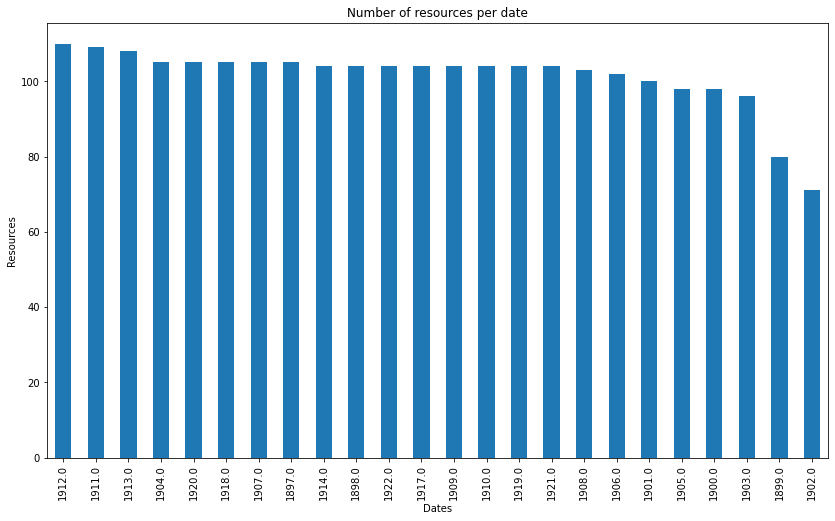

In [8]:
# First we create a new column in pandas with the year
#df['year'] = pd.DatetimeIndex(df['year']).year

ax = df['year'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of resources per date")
ax.set_xlabel("Dates")
ax.set_ylabel("Resources")
plt.show()

Make a boolean mask

In [9]:
#greater than the start date and smaller than the end date
mask = (df['year'] >= 1910) & (df['year'] <= 1920)

Select the sub-DataFrame

In [ ]:
decade = df.loc[mask]

We create an auxiliar class to store the terms and the codes

A minimal perfect hash is a birectional mapping between objects and consecutive integers

In [ ]:
class MPHash(object):
    # create from iterable 
    def __init__(self, terms):
        self.term = list(terms)
        self.code = {t:n for n, t in enumerate(self.term)}
    
    def __len__(self):
        return len(self.term)
    
    def get_code(self, term):
        return self.code.get(term)
    
    def get_term(self, code):
        return self.term[code]

## Extracting trend topics

This class recibes the texts to extract the trend topics by year.

In [ ]:
# A sample is a collection of texts and publication dates 
# For each text, the sample stores its year and word counts. 
class Sample(object):
    pattern = pattern = r"(?:\w+[-])*\w*[^\W\d_]\w*(?:[-'’`]\w+)*"
    # Create Sample from data stored in a DataFrame with at least columns 
    # TEXT, YEAR
    # n = maximal ngram size 
    def __init__(self, data, ngram_length):
        self.size = len(data)
        self.year = data.year.tolist()
        
        texts = tuple(data.ocr_text)
        vectorizer = CountVectorizer(token_pattern = Sample.pattern, 
                                     max_df=0.1,
                                     ngram_range=(1, ngram_length))
        matrix = vectorizer.fit_transform(texts).transpose() 
        # remove all hapax legomena to save space
        terms = vectorizer.get_feature_names()
        frequencies = matrix.sum(axis=1).A1
        selected = [m for m, f in enumerate(frequencies) if f > 1]
        hapax_rate = 1 - len(selected) / len(frequencies)
        print('Removing hapax legomena ({:.1f}%)'.format(100 * hapax_rate))
        self.matrix = matrix[selected, :]      
        self.term_codes = MPHash([terms[m] for m in selected])
        
        # store array with global term frequencies
        self.term_frequencies = self.matrix.sum(axis=1).A1
        # store doc frequencies
        self.doc_frequencies = self.matrix.getnnz(axis=1)
        # store most common capitalization of terms
        print('Obtaining most common capitalizations')
        vectorizer.lowercase = False
        matrix = vectorizer.fit_transform(texts).transpose()
        terms = vectorizer.get_feature_names()
        frequencies = matrix.sum(axis=1).A1    
        forms = dict()
        for t, f in zip(terms, frequencies):
            low = t.lower()
            if forms.get(low, (None, 0))[1] < f:
                forms[low] = (t, f)
        self.capitals = {k:v[0] for k, v in forms.items()}
        
        print('Computed stats for', len(self.term_codes), 'terms')
        
    # return the number of texts stored in this Sample
    def __len__(self):
        return self.size
    
    # return term frequency of the specified term
    def get_tf(self, term):
        code = self.term_codes.get_code(term.lower())
        
        return self.term_frequencies[code]
    
    # return document frequency of the specified term
    def get_df(self, term):
         code = self.term_codes.get_code(term.lower())
         
         return self.doc_frequencies[code]
     
    # return the most frequent capitalization form
    # (also for stopwords not in dictionary)
    def most_frequent_capitalization(self, term):
        return self.capitals.get(term.lower(), term)
    
    # return the average submission year of texts containing every term
    def average_year(self, period, tf_threshold=20, df_threshold=3):
        docs = [n for n, y in enumerate(self.year)\
                if period[0] <= y <= period[1]]
        tf_matrix = self.matrix[:, docs]
        tf_sum = tf_matrix.sum(axis=1).A1
        df_sum = tf_matrix.getnnz(axis=1)
        terms = [m for m, tf in enumerate(tf_sum)\
                 if tf >= tf_threshold and df_sum[m] >= df_threshold]
        tf_matrix = tf_matrix[terms, :]     
        rows, cols = tf_matrix.nonzero()
        df_matrix = csr_matrix((ones(len(rows)), (rows, cols)))
        year = [self.year[n] for n in docs]
        
        res = df_matrix @ year / df_matrix.getnnz(axis=1) # @ operator = matrix multiplication
        
        return {self.term_codes.get_term(terms[m]):res[m] for m in range(len(res))}

        
    # return the number of occurrences (doc frequency) for every term 
    def get_df_per_year(self, term):
        m = self.term_codes.get_code(term)
        row = self.matrix.getrow(m)
        _, docs = row.nonzero()
        c = Counter(map(self.year.__getitem__, docs))

        return c
          
    # return the number of occurrences (term frequency) for every term
    def tf_per_year(self, period=None):
        rows, cols = self.matrix.nonzero()
        res = {m:Counter() for m in rows}
        for m, n in zip(rows, cols):
            year = self.year[n]
            if period == None or period[0] <= year <= period[1]:
                res[m][year] += self.matrix[m, n]
            
        return res
    
    def plot_tf_series(self, term, period, relative=False):
        m = self.term_codes.get_code(term)
        if relative:
            norm = Counter(self.year)
        else:
            norm = Counter(set(self.year))
            
        if m:
            row = self.matrix.getrow(m)
            _, cols = row.nonzero()
            c = Counter()
            for n in cols:
                year = self.year[n]
                if period == None or period[0] <= year <= period[1]:
                    c[year] += row[0, n]
            
            X = sorted(c.keys())
            Y = [c[x] / norm[x] for x in X]
            plt.plot(X, Y, 'o-')
            plt.ylim(0, 1.2 * max(Y))
            plt.title(term)       
        else:
            raise ValueError('{} is not in store'.format(term))
             
    # return dictionary with a list of text-years per term 
    # period = pair of years (min _year, max_year) inclusive
    # keep_all = true if unlisted texts are not ignored
    def document_years(self, period=None, keep_all=True):
        rows, cols = self.matrix.nonzero()
        res = {m:list() for m in rows}
        for m, n in zip(rows, cols):
            if keep_all or self.listed[n]:
                year = self.year[n]
                print(year)
                if period == None or period[0] <= year <= period[1]:
                    res[m].append(year)
        
        return res
    
    # return dictionary with Counter of abstract-years per term
    def df_per_year(self, period=None, keep_all=True):
        doc_years = self.document_years(period, keep_all)
        
        return {m:Counter(v) for m, v in doc_years.items()}
    
    # create a plot with document frequency of terms
    def plot_df(self, terms, period, keep_all=True):
        dfs = self.df_per_year(period, keep_all)
        for term in terms:
            m = self.term_codes.get_code(term.lower())
            df = dfs[m] 
            X = range(*period)
            Y = [df.get(x, 0) for x in X]
            plt.clf()
            plt.plot(X, Y)
            plt.title(term)
            filename = 'plots/{}.png'.format(term)
            print('Saving', filename)
            plt.savefig(filename, dpi=200)
            
    # compute the average age in the specified period of documents containing 
    # each term with global term-frequency above tf_threshold
    # and annual document frequency above df_threshold (one year at least)
    # period = optional pair of years (min _year, max_year) inclusive
    def get_ages(self, period=None, 
                 tf_threshold=20, df_threshold=3, keep_all=True):
        res = dict()
        doc_years = self.document_years(period, keep_all)
        for m, values in doc_years.items():
            term = self.term_codes.get_term(m)
            if len(values) > 0:
                df = Counter(values).most_common(1)[0][1]
                tf = self.term_frequencies[m]
                #break;
                if df >= df_threshold and tf >= tf_threshold:       
                    res[term] = mean(values)
        return res
    
    # return abstract numbers containing any term in this set of terms
    def docs_with_term(self, terms, period=None):
        rows, cols = self.matrix.nonzero()
        res = set()
        for m, n in zip(rows, cols):
            term  = self.term_codes.get_term(m)
            if terms == None or term in terms:
                year = self.year[n]
                if period == None or period[0] <= year <= period[1]:
                     res.add(n)
                
        return res
            
       
    def search(self, term):
        m = self.term_codes.get_code(term)
        docs = self.matrix.getrow(m).nonzero()[1]
        
        return [(self.year[n], self.type[n], self.panel[n]) for n in docs]

### Using the Sample class to extract the trend topics

In [ ]:
# All data
#data = df

# dataframe 1910-1920
data = decade

In [ ]:
data = data[data.ocr_text.str.len() > 40]   

print('Processing', len(data), 'texts')

s = Sample(data, 2)

## Saving the pickle object

The [pickle](https://docs.python.org/3/library/pickle.html) module implements binary protocols for serializing and de-serializing a Python object structure.

In [ ]:
with open('sample-loc.pkl', 'wb') as f:
    pickle.dump(s, f)

In [ ]:
with open('sample-loc.pkl', 'rb') as f:
    s = pickle.load(f)
print('Loaded stats for', len(s), 'texts')

## Setting a period

In [ ]:
period = (1910, 1920)

In [ ]:
ages = s.get_ages(period)

In [ ]:
top = pd.DataFrame.from_dict(ages, orient='index').reset_index()
print(top)

In [ ]:
top.columns = ['TERM', 'AGE']
top = top.sort_values('AGE', ascending=False).head(250)   
top['DOC FREQ'] = top.TERM.apply(s.get_df)
top['TERM FREQ'] = top.TERM.apply(s.get_tf)

In [ ]:
# prepare to export
top['TERM'] = top.TERM.apply(s.most_frequent_capitalization)
print(top.set_index('TERM').head())

In [ ]:
ts = pd.datetime.now().strftime("%Y-%m-%d_%H.%M")    
filename = 'output/vocabulary_{}.xlsx'.format(ts)
with pd.ExcelWriter(filename) as writer:
    top.set_index('TERM').to_excel(writer, sheet_name='terms')

print('vocabulary saved to', filename)